#### Practical Statistics for Data Scientists (Python)
#### Chapter 1. Exploratory Data Analysis
##### > (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck


In [6]:

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'dataset/data'

In [7]:
# Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'


In [20]:
## Estimates of Location
### Example: Location Estimates of Population and Murder Rates

# Table 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


To compute mean and median in Python we can use the pandas methods of the data frame

In [21]:
print(state['Population'].mean())
print(trim_mean(state['Population'],0.1))
# This is because the trimmed mean excludes the largest and smallest five states (trim=0.1 drops 10% from each end).
print(state['Population'].median())

# The mean is bigger  than the trimmed mean, which is bigger than the median 

6162876.3
4783697.125
4436369.5


In [22]:
print(np.average(state['Murder.Rate'], weights=state['Population']))
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

#In this case, the weighted mean and the weighted median are about the same

4.445833981123393
4.4


In [23]:
# Standard Deviation
print(state["Population"].std())
# IQR
# A common measurement of variability is the difference between the 25th percentile and the 75th percentile, called the interquartile range (or IQR)
print(state["Population"].quantile(0.75) - state["Population"].quantile(0.25))
# Mean absolute deviation
print(robust.scale.mad(state["Population"]))


6848235.347401142
4847308.0
3849876.1459979336


In [24]:
# Quantile

state["Murder.Rate"].quantile([0.05,0.25,0.5,0.75,0.95])


0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

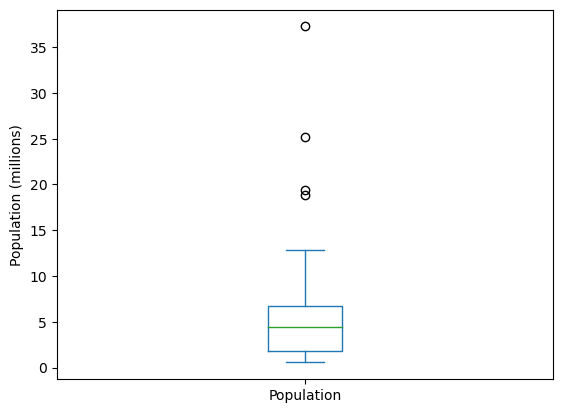

In [25]:
# Boxplots

ax = (state["Population"]/1000000).plot.box()
ax.set_ylabel("Population (millions)")

In [26]:
binnedPopulation = pd.cut(state['Population'],10) #Cortar del mismo tamano los intervalos
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

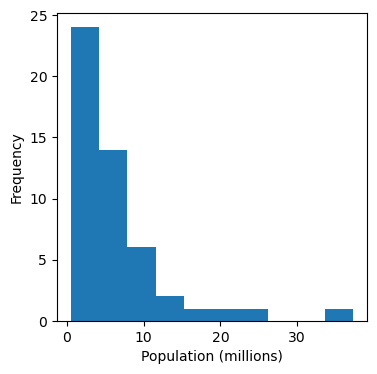

In [27]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

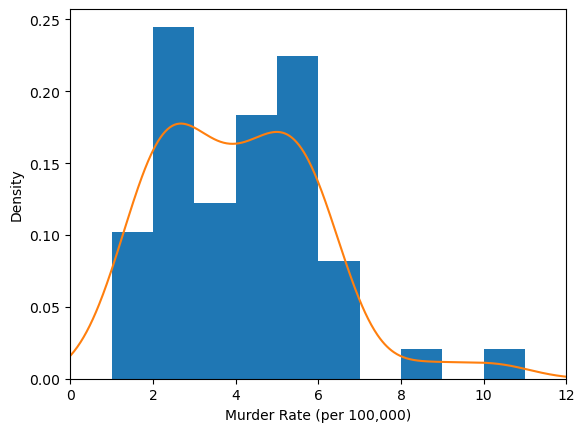

In [28]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12],bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')


In [29]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)

Text(0, 0.5, 'Count')

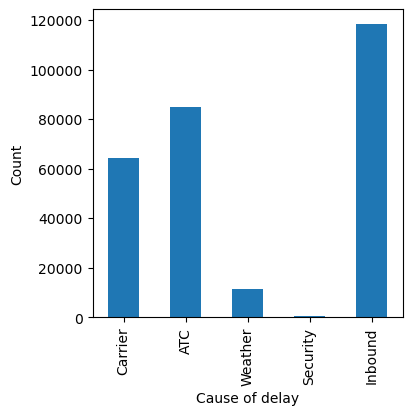

In [30]:
ax = dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [31]:
## Correlation
# First read the required datasets

sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

<AxesSubplot:>

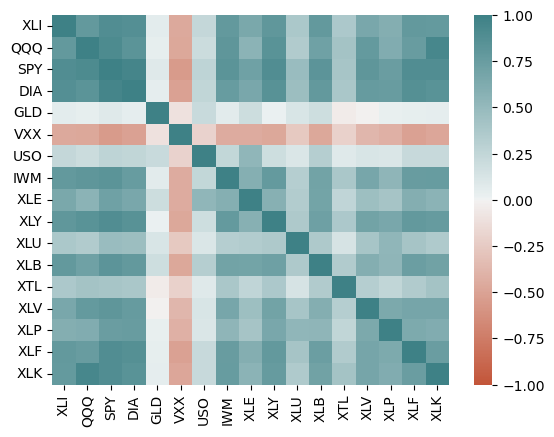

In [32]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',sp500_sym[sp500_sym['sector']=='etf']['symbol']]
sns.heatmap(etfs.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(20,200,as_cmap=True))

In [33]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


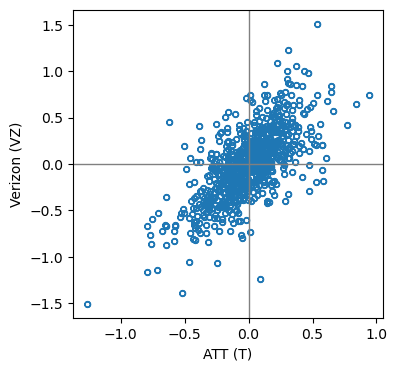

In [34]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

In [35]:
# Exploring Two or More Variables
# Load the kc_tax dataset and filter based on a variety of criteria
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


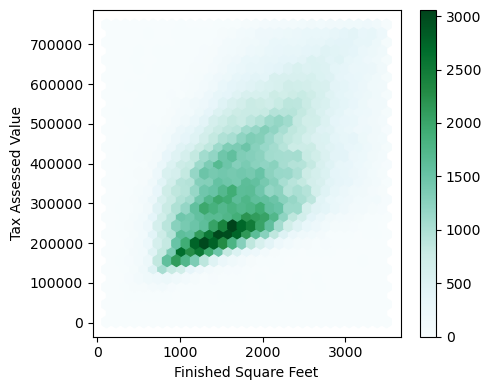

In [36]:
### Hexagonal binning and Contours 
#### Plotting numeric versus numeric data

# If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The `hexbin` method for _pandas_ data frames is one powerful approach.

ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

In [37]:
ax = sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, ax=ax)
ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax-Assesed Value")


/home/josho/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(24.0, 0.5, 'Tax-Assesed Value')

In [38]:
### Two Categorical Variables
# Load the `lc_loans` dataset

lc_loans = pd.read_csv(LC_LOANS_CSV)

In [42]:
crosstab = lc_loans.pivot_table(index="grade", columns="status", aggfunc=lambda x: len(x), margins=True)
crosstab


status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [43]:
df = crosstab.loc["A":"G",:].copy()  #eliminar la fila de "ALL"
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241


In [46]:
df.loc[:,"Charged Off": "Late"] = df.loc[:,"Charged Off":"Late"].div(df["All"], axis=0)

In [48]:
df["All"] = df["All"]/sum(df["All"])
perc_crosstab = df

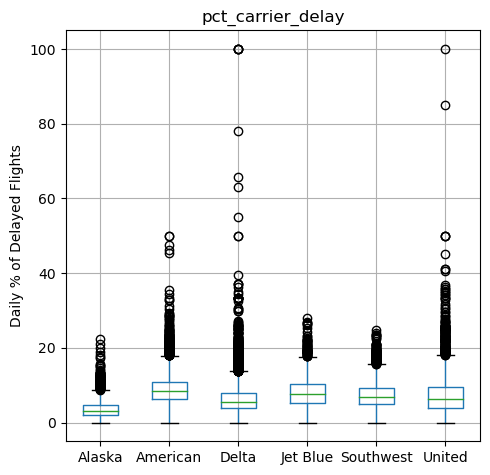

In [49]:
## Categorical and Numeric Data
# _Pandas_ boxplots of a column can be grouped by a different column.

airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

/home/josho/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Daily % of Delayed Flights')

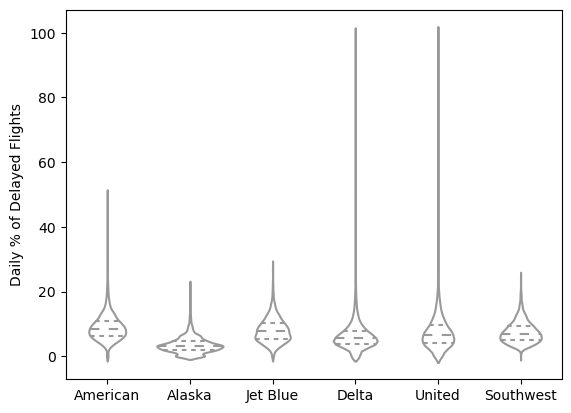

In [51]:
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay, inner="quartile", color="white")
ax.set_xlabel("")
ax.set_ylabel("Daily % of Delayed Flights")

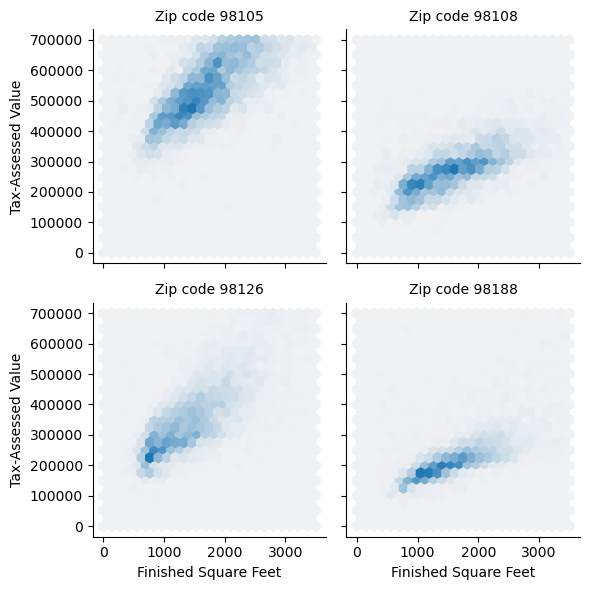

In [55]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x,y,color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y,gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col="ZipCode", col_wrap=2)
g.map(hexbin, "SqFtTotLiving", "TaxAssessedValue", extent=[0,3500, 0, 700000])

g.set_axis_labels("Finished Square Feet", "Tax-Assessed Value")
g.set_titles("Zip code {col_name:.0f}")

#### Chapter 2. Data and Sampling Distributions
##### > (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [8]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

In [9]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze("columns")
loans_income

sample_data = pd.DataFrame({
    "income":loans_income.sample(1000),
    "type": "Data",
})

sample_mean_05 = pd.DataFrame({
    "income" : [loans_income.sample(5).mean() for _ in range(1000)],
    "type": "Mean of 5",
})

sample_mean_20 = pd.DataFrame({
    "income" : [loans_income.sample(20).mean() for _ in range(10000)],
    "type": "Mean of 20"
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

        income  type
13949  68000.0  Data
43979  30000.0  Data
9886   80000.0  Data
32647  24000.0  Data
14609  50000.0  Data


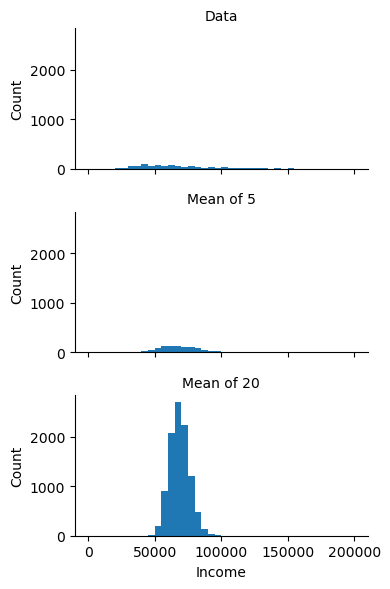

In [10]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -80.22950000000128
std. error: 223.64921204824066
